### Wednesday, May 3rd, 2023
Now that I've got GDN set up and the WADI data in the right format, I'm ready to try running GDN on the WADI data. The [GDN paper](https://arxiv.org/pdf/2106.06947.pdf) has this to say about their traning process:

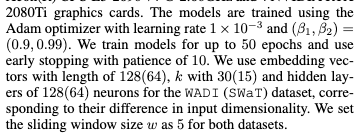

The GDN run script:

In [1]:
!cat /home/callistb/GDN/run.sh

gpu_n=$1
DATASET=$2

seed=5
BATCH_SIZE=32
SLIDE_WIN=5
dim=64
out_layer_num=1
SLIDE_STRIDE=1
topk=5
out_layer_inter_dim=128
val_ratio=0.2
decay=0


path_pattern="${DATASET}"
COMMENT="${DATASET}"

EPOCH=30
report='best'

if [[ "$gpu_n" == "cpu" ]]; then
    python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $BATCH_SIZE \
        -epoch $EPOCH \
        -comment $COMMENT \
        -random_seed $seed \
        -decay $decay \
        -dim $dim \
        -out_layer_num $out_layer_num \
        -out_layer_inter_dim $out_layer_inter_dim \
        -decay $decay \
        -val_ratio $val_ratio \
        -report $report \
        -topk $topk \
        -device 'cpu'
else
    CUDA_VISIBLE_DEVICES=$gpu_n  python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $BA

#### Looks like we'll have to override some values. Let's try this:

In [14]:
!sed \
    -e s/dim=64/dim=128/ \
    -e s/topk=5/topk=30/ \
    -e s/EPOCH=30/EPOCH=50/ \
    /home/callistb/GDN/run.sh \
| tee /home/callistb/GDN/run_wadi.sh

gpu_n=$1
DATASET=$2

seed=5
BATCH_SIZE=32
SLIDE_WIN=5
dim=128
out_layer_num=1
SLIDE_STRIDE=1
topk=30
out_layer_inter_dim=128
val_ratio=0.2
decay=0


path_pattern="${DATASET}"
COMMENT="${DATASET}"

EPOCH=50
report='best'

if [[ "$gpu_n" == "cpu" ]]; then
    python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $BATCH_SIZE \
        -epoch $EPOCH \
        -comment $COMMENT \
        -random_seed $seed \
        -decay $decay \
        -dim $dim \
        -out_layer_num $out_layer_num \
        -out_layer_inter_dim $out_layer_inter_dim \
        -decay $decay \
        -val_ratio $val_ratio \
        -report $report \
        -topk $topk \
        -device 'cpu'
else
    CUDA_VISIBLE_DEVICES=$gpu_n  python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $

#### Okay, let's try to run it.

In [15]:
!cd /home/callistb/GDN; bash run_wadi.sh 0 wadi

epoch (0 / 50) (Loss:0.01387615, ACU_loss:26.47569884)
epoch (1 / 50) (Loss:0.00649888, ACU_loss:12.39986339)
epoch (2 / 50) (Loss:0.00608996, ACU_loss:11.61964642)
epoch (3 / 50) (Loss:0.00584031, ACU_loss:11.14330236)
epoch (4 / 50) (Loss:0.00573203, ACU_loss:10.93670662)
epoch (5 / 50) (Loss:0.00561452, ACU_loss:10.71249850)
epoch (6 / 50) (Loss:0.00552427, ACU_loss:10.54031532)
epoch (7 / 50) (Loss:0.00550816, ACU_loss:10.50956139)
epoch (8 / 50) (Loss:0.00519133, ACU_loss:9.90504916)
epoch (9 / 50) (Loss:0.00510255, ACU_loss:9.73565994)
epoch (10 / 50) (Loss:0.00504378, ACU_loss:9.62353336)
epoch (11 / 50) (Loss:0.00491932, ACU_loss:9.38605698)
epoch (12 / 50) (Loss:0.00481170, ACU_loss:9.18072241)
epoch (13 / 50) (Loss:0.00477489, ACU_loss:9.11049907)
epoch (14 / 50) (Loss:0.00473837, ACU_loss:9.04081042)
epoch (15 / 50) (Loss:0.00471954, ACU_loss:9.00487341)
epoch (16 / 50) (Loss:0.00467173, ACU_loss:8.91366435)
epoch (17 / 50) (Loss:0.00464066, ACU_loss:8.85438373)
epoch (18 / 

The precision should be much higher:

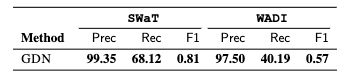

Something is amiss. It looks like some overfitting could be happening:

Text(0, 0.5, 'ACU_loss')

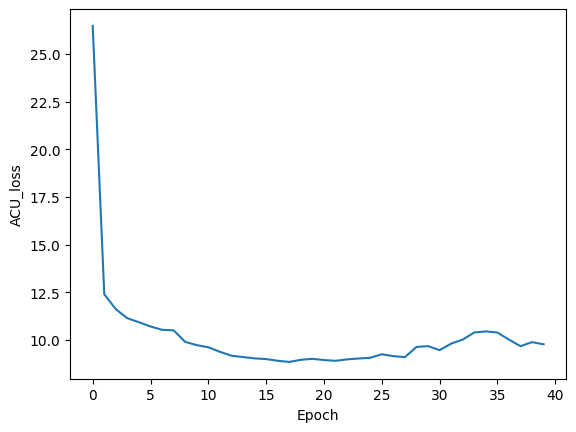

In [29]:
history = """
epoch (0 / 50) (Loss:0.01387615, ACU_loss:26.47569884)
epoch (1 / 50) (Loss:0.00649888, ACU_loss:12.39986339)
epoch (2 / 50) (Loss:0.00608996, ACU_loss:11.61964642)
epoch (3 / 50) (Loss:0.00584031, ACU_loss:11.14330236)
epoch (4 / 50) (Loss:0.00573203, ACU_loss:10.93670662)
epoch (5 / 50) (Loss:0.00561452, ACU_loss:10.71249850)
epoch (6 / 50) (Loss:0.00552427, ACU_loss:10.54031532)
epoch (7 / 50) (Loss:0.00550816, ACU_loss:10.50956139)
epoch (8 / 50) (Loss:0.00519133, ACU_loss:9.90504916)
epoch (9 / 50) (Loss:0.00510255, ACU_loss:9.73565994)
epoch (10 / 50) (Loss:0.00504378, ACU_loss:9.62353336)
epoch (11 / 50) (Loss:0.00491932, ACU_loss:9.38605698)
epoch (12 / 50) (Loss:0.00481170, ACU_loss:9.18072241)
epoch (13 / 50) (Loss:0.00477489, ACU_loss:9.11049907)
epoch (14 / 50) (Loss:0.00473837, ACU_loss:9.04081042)
epoch (15 / 50) (Loss:0.00471954, ACU_loss:9.00487341)
epoch (16 / 50) (Loss:0.00467173, ACU_loss:8.91366435)
epoch (17 / 50) (Loss:0.00464066, ACU_loss:8.85438373)
epoch (18 / 50) (Loss:0.00469881, ACU_loss:8.96533012)
epoch (19 / 50) (Loss:0.00472628, ACU_loss:9.01773562)
epoch (20 / 50) (Loss:0.00469217, ACU_loss:8.95266025)
epoch (21 / 50) (Loss:0.00467120, ACU_loss:8.91265845)
epoch (22 / 50) (Loss:0.00471013, ACU_loss:8.98693189)
epoch (23 / 50) (Loss:0.00473495, ACU_loss:9.03429207)
epoch (24 / 50) (Loss:0.00475379, ACU_loss:9.07022686)
epoch (25 / 50) (Loss:0.00485060, ACU_loss:9.25494953)
epoch (26 / 50) (Loss:0.00480069, ACU_loss:9.15971931)
epoch (27 / 50) (Loss:0.00477100, ACU_loss:9.10306084)
epoch (28 / 50) (Loss:0.00505142, ACU_loss:9.63810371)
epoch (29 / 50) (Loss:0.00507558, ACU_loss:9.68421013)
epoch (30 / 50) (Loss:0.00496382, ACU_loss:9.47096099)
epoch (31 / 50) (Loss:0.00514345, ACU_loss:9.81369629)
epoch (32 / 50) (Loss:0.00525350, ACU_loss:10.02367237)
epoch (33 / 50) (Loss:0.00545017, ACU_loss:10.39891797)
epoch (34 / 50) (Loss:0.00547849, ACU_loss:10.45296492)
epoch (35 / 50) (Loss:0.00544921, ACU_loss:10.39709418)
epoch (36 / 50) (Loss:0.00525335, ACU_loss:10.02338554)
epoch (37 / 50) (Loss:0.00507376, ACU_loss:9.68072587)
epoch (38 / 50) (Loss:0.00518441, ACU_loss:9.89185332)
epoch (39 / 50) (Loss:0.00512474, ACU_loss:9.77800141)
"""
losses = [
    float(line.split(',')[-1].split(':')[-1].rstrip(')'))
    for line in history.split('\n') if line != ''
]
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("ACU_loss")

Looks like it stops fitting around epoch 15-20, so let's try again with fewer epochs:

In [31]:
!sed \
    -e s/dim=64/dim=128/ \
    -e s/topk=5/topk=30/ \
    -e s/EPOCH=30/EPOCH=15/ \
    /home/callistb/GDN/run.sh \
> /home/callistb/GDN/run_wadi.sh

!cd /home/callistb/GDN; bash run_wadi.sh 0 wadi

epoch (0 / 15) (Loss:0.01375848, ACU_loss:26.25118678)
epoch (1 / 15) (Loss:0.00609884, ACU_loss:11.63658704)
epoch (2 / 15) (Loss:0.00554738, ACU_loss:10.58439762)
epoch (3 / 15) (Loss:0.00533381, ACU_loss:10.17691812)
epoch (4 / 15) (Loss:0.00522902, ACU_loss:9.97697708)
epoch (5 / 15) (Loss:0.00516413, ACU_loss:9.85316068)
epoch (6 / 15) (Loss:0.00510521, ACU_loss:9.74074541)
epoch (7 / 15) (Loss:0.00511841, ACU_loss:9.76592376)
epoch (8 / 15) (Loss:0.00504578, ACU_loss:9.62734965)
epoch (9 / 15) (Loss:0.00494054, ACU_loss:9.42654413)
epoch (10 / 15) (Loss:0.00492562, ACU_loss:9.39808535)
epoch (11 / 15) (Loss:0.00501658, ACU_loss:9.57163398)
epoch (12 / 15) (Loss:0.00495585, ACU_loss:9.45576817)
epoch (13 / 15) (Loss:0.00494156, ACU_loss:9.42850147)
epoch (14 / 15) (Loss:0.00487587, ACU_loss:9.30316664)
=========================** Result **============================

F1 score: 0.44407158836689037
precision: 0.5096525096525096
recall: 0.3920792079207921



#### Hmm.

Still not there. Either the data wasn't preprocessed correctly, or the hyperparameters are off, or it's something else. I'll have to dig in under the hood to see what's going on, and/or try to get in touch with the authors.